In [1]:
from langgraph.graph import StateGraph, START, END
from src.main.schemas import LocatorState
from typing import List
from src.main.models.llms import ElementNamingModel
from src.main.readers import HTMLReader

In [2]:
from lxml import etree

In [ ]:
# import requests

# API_URL = "https://api-inference.huggingface.co/models/google/flan-t5-small"
# headers = {"Authorization": "Bearer api_key"}  # replace with your Hugging Face token

# def query(payload):
#     response = requests.post(API_URL, headers=headers, json={'inputs' : payload})
#     print(response.status_code, response.text)
#     return response.json()

# # Example prompt (instruction style, since FLAN-T5 is instruction-tuned)
# output = query('Give a descriptive name for the given html tag <input type="submit" class="btn btn-white btn-50 btn-arrow" id="loginBtn" value="Log in"/>&#13;\n ')

# print(output)


In [4]:
reader = HTMLReader()
dom = reader.readFromFile('C:\\Users\\zubair.shaik\\Desktop\\xpathfinder\\dom2.xml')

In [5]:
from lxml.cssselect import CSSSelector

In [6]:
s = CSSSelector('h1')
dom = dom.getroottree() if hasattr(dom, "getroottree") else dom
e = s(dom)
for i in e:
    print(i)

<Element h1 at 0x217997894f0>


In [7]:
from src.main.validators import ValidateLocator


v = ValidateLocator(dom)

In [9]:
dom.xpath("//h1")

[<Element h1 at 0x217997894f0>]

In [8]:
v.is_valid_cssSelector("h1")

<Element h1 at 0x217997894f0>


True

In [5]:
type(dom.xpath("//*"))

list

In [6]:
dom.xpath("//*")[3]

<Element meta at 0x25784649b80>

In [7]:
for i, j in dict(enumerate(dom.xpath("//*"))).items():
    print(i, j)

0 <Element html at 0x257834b8780>
1 <Element head at 0x25784649a90>
2 <Element title at 0x25784649b30>
3 <Element meta at 0x25784649b80>
4 <Element meta at 0x25784649a40>
5 <Element meta at 0x25784649e00>
6 <Element style at 0x2578464a210>
7 <Element body at 0x25784649c20>
8 <Element div at 0x2578464a260>
9 <Element h1 at 0x2578464a8a0>
10 <Element p at 0x2578464a850>
11 <Element p at 0x257941385f0>
12 <Element a at 0x25794139c70>


In [8]:
raw_element_dom = '<body><div class="help-article"><h1>Example Domains</h1><p></p></div></body>'
raw_element = '<h1>Example Domains</h1>'

In [9]:
element = reader.readFromString(raw_element)
element_dom = reader.readFromString(raw_element_dom)

In [10]:
from src.main.generator.helpers import CssSelectorHelper


helper = CssSelectorHelper()

In [11]:
from src.main.utils import DomExplorer


ex = DomExplorer()

In [12]:
helper.get_basic_selectors(element_dom)

['div', '.help-article', 'div.help-article']

In [13]:
element_dom

<Element div at 0x25794139e00>

In [14]:
ex.find_all_parents(element, element_dom)

[None, <Element div at 0x25794139e00>]

In [15]:
helper.run(element, element_dom)

{'.help-article > h1', 'div > h1', 'div.help-article > h1', 'h1'}

In [27]:
a = list(enumerate(dom.xpath("//*")))

In [28]:
len(a)

13

In [14]:
from src.main.searchers import SearchHelper

In [15]:
sr = SearchHelper()

In [17]:
fe = sr.filter_elements(a)
len(fe)

1594

In [ ]:
from src.main.searchers import SearchHelper

searcher = SearchWithEmbeddings(dom.xpath("//*"), HuggingFaceAPIEmbeddings(), ElementNamingModel(), FaissVectorStore(), SearchHelper())

In [ ]:
searcher.setup()

In [ ]:
a = searcher.search("49%")

AttributeError: 'NoneType' object has no attribute 'similarity_search_with_score'

In [ ]:
a.getparent()

<Element fieldset at 0x1b2fb1c2210>

In [ ]:
from lxml import html, etree

def get_partial_dom(target, levels=1):
    current = etree.Element(target.tag, **target.attrib)
    current.text = target.text

    for i in range(levels):
        original = target
        parent = target.getparent()
        if parent is None:
            break

        prev = original.getprevious()
        nxt = original.getnext()

        # Clone parent without children
        partial_parent = etree.Element(parent.tag, **parent.attrib)

        # Add prev sibling
        if prev is not None:
            partial_parent.append(etree.Element(prev.tag, **prev.attrib))

        # Add current
        partial_parent.append(current)

        # Add next sibling
        if nxt is not None:
            partial_parent.append(etree.Element(nxt.tag, **nxt.attrib))

        # Update loop vars
        target = parent
        current = partial_parent

    return etree.tostring(current).decode()

In [ ]:
etree.tostring(a).decode()

'<input class="in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value=""/>&#13;\n            &#13;\n        '

In [ ]:
<input class="input-validation-error in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value="">



In [ ]:
etree.tostring(a.getprevious()).decode()

'<div class="label-wrap">&#13;\n                <label class="bolded" for="Email">Email</label>&#13;\n            </div>&#13;\n            '

In [ ]:
el = get_partial_dom(a, 2)

In [ ]:
el

'<form action="/Account/Login" autocomplete="off" class="_causes-notifications" id="loginForm" method="post"><div class="top-notifs hide-sm"/><fieldset class="form-row"><div class="label-wrap"/><input class="in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value=""/></fieldset><fieldset class="form-row"/></form>'

In [ ]:
<form action="/Account/Login" autocomplete="off" class="_causes-notifications" id="loginForm" method="post">
    <div class="top-notifs hide-sm"></div>
    <fieldset class="form-row">
        <div class="label-wrap"></div>
        <input class="in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value="">
    </fieldset>
    <fieldset class="form-row"></fieldset>
</form>

In [ ]:
'<form action="/Account/Login" autocomplete="off" class="_causes-notifications" id="loginForm" method="post">'
'   <div class="top-notifs hide-sm"/>'
'   <fieldset class="form-row">'
'       <div class="label-wrap"/>'
'       <input class="in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value=""/>'
'   </fieldset><fieldset class="form-row"/></form>'

In [ ]:
t = ['<title> Member | Doctor Care Anywhere', "<strong> We've upgraded our login system.<br>Please re-enter your login details as part of this upgrade.", '<a> Google Chrome', '<a class="btn btn-30 fright" id="closeWarningInIE"> Close', '<header class="header">', '<a class="logo">', '<span class="ico ico-logo">', '<h2> Log in', "<strong> We've upgraded our login system.<br>Please re-enter your login details as part of this upgrade.", '<input name="__RequestVerificationToken" value="HOIThl8lBAKyRZEria5xhMUcmFuAl07ldw60G-cnlJpDydv_g3rEowWVgv9Kt2No6v7QN2S7V9m0HgXPNI2LdTkSoB41">', '<label class="bolded"> Email', '<input class="in-text mp-no-track" id="Email" name="Email" value="">', '<label class="bolded"> Password', '<input class="in-text mp-no-track" id="Password" name="Password">', '<a class="link white-link do-trigger-overlay" id="forgottenPasswordLink"> Forgotten your password?', '<input class="btn btn-white btn-50 btn-arrow" id="loginBtn" value="Log in">', "<span> Don't have an account?", '<a class="link white-link" id="signupLink"> Sign up', '<a class="modal-close do-close-overlay">', '<strong class="_toast-alert-message">', '<ul class="fleft">', '<span> ©2025 Doctor Care Anywhere Ltd.', '<a> Terms and conditions', '<a> Privacy', '<a class="fright">', '<button class="iubenda-tp-btn iubenda-cs-preferences-link">', '<label class="iub-sr-only"> Your consent preferences for tracking technologies']
n = ['"doctor profile"', 'login system upgrade notice', 'link to chrome', '"ie close button"', 'site header', 'sitelogolink', 'logo icon', 'login header', 'login system upgrade notification', 'antiforgerytoken', 'email label', 'email field', 'password label', 'password field', '"password recovery link"', 'login button', '"no account prompt"', 'signup button', 'close overlay link', 'alert message', 'float left list', 'copyright notice', '"t&c link"', 'link to privacy policy', 'float right', 'cookie preferences button', 'consent label']

In [ ]:
n.index("login button")

15

In [ ]:
t[15]

'<input class="btn btn-white btn-50 btn-arrow" id="loginBtn" value="Log in">'

In [ ]:
etree.tostring(a)

b'<input type="submit" class="btn btn-white btn-50 btn-arrow" id="loginBtn" value="Log in"/>&#13;\n                        '

In [ ]:
strategies = [IdLocator(IdHelper()), CssSelectorLocator(CssSelectorHelper()), XPathLocator(XPathHelper())]
validator = ValidateLocator(dom)

In [ ]:
graph = StateGraph(LocatorState)

graph.add_node('parse', make_extract_element_node(reader))
graph.add_node('generator', make_generate_locator_node(strategies))
graph.add_node('validator', make_check_uniqueness_node(validator))

graph.add_edge(START, 'parse')
graph.add_edge('parse', 'generator')
graph.add_edge('generator', 'validator')
graph.add_edge('validator', END)
# graph.add_edge('generator', END)

workflow = graph.compile()

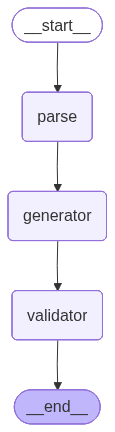

In [ ]:
workflow

In [ ]:
initial_state = {
    'dom' : dom,
    'raw_element' : etree.tostring(a).decode(),
    'raw_element_dom' : el
}

In [ ]:
'<form action="/Account/Login" autocomplete="off" class="_causes-notifications" id="loginForm" method="post">'
'   <div class="top-notifs hide-sm"/>'
'   <fieldset class="form-row">'
'       <div class="label-wrap"/>'
'           <input class="in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value=""/>'
'   </fieldset>'
'   <fieldset class="form-row"/>'
'</form>'

'<form action="/Account/Login" autocomplete="off" class="_causes-notifications" id="loginForm" method="post"><div class="top-notifs hide-sm"/><fieldset class="form-row"><div class="label-wrap"/><input class="in-text mp-no-track" id="Email" maxlength="100" name="Email" placeholder="Enter email..." type="text" value=""/></fieldset><fieldset class="form-row"/></form>'

In [ ]:
new_state = make_extract_element_node(reader)(initial_state)

In [ ]:
make_generate_locator_node(strategies)(new_state)

AttributeError: 'NoneType' object has no attribute 'tag'

In [ ]:
workflow.invoke(initial_state)

AttributeError: 'NoneType' object has no attribute 'tag'